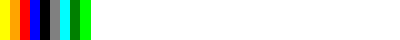

In [1]:
from colour import Color
from PIL import Image, ImageDraw

tests = [
    Color("yellow"),
    Color("orange"),
    Color("red"),
    Color("blue"),
    Color("black"),
    Color("gray"),
    Color("cyan"),
    Color("green"),
    Color("lime"),
]

def to_rgb(c: Color) -> tuple:
    return tuple([int(_ * 255) for _ in c.rgb])
    
    
def scale(colors: list) -> None:
    im = Image.new('RGB', (400, 40), to_rgb(Color("white")))
    draw = ImageDraw.Draw(im)
    for i, c in enumerate(colors):
        draw.rectangle((i * 10, 0, 10 + i * 10, 40), fill=to_rgb(c))
    im.show()

def copy(c: Color) -> Color:
    return Color(c.web)

scale(tests)

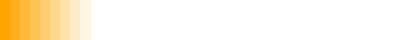

[<Color orange>, <Color #ffaf1d>, <Color #ffba39>, <Color #ffc456>, <Color #ffce72>, <Color #ffd88f>, <Color #ffe2ac>, <Color #ffecc8>, <Color #fff6e5>]


In [19]:
c1 = Color("orange")
c2 = copy(c1)
c2.set_luminance(0.95)
scale(list(c1.range_to(c2, 9)))
print(list(c1.range_to(c2, 9)))

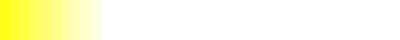

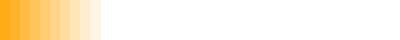

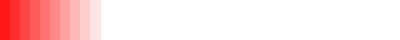

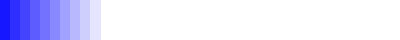

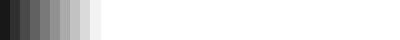

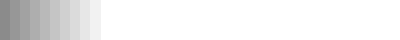

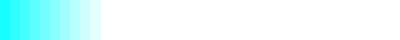

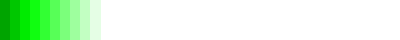

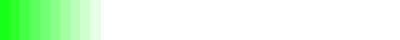

In [3]:
def test_luminance(c1: Color) -> None:
    colors = []
    iteration = 10
    pas = (0.95 - c1.get_luminance()) / iteration
    for i in range(iteration):
        lum = c1.get_luminance() + pas
        c1.set_luminance(lum)
        colors.append(copy(c1))
    scale(colors)

for c in tests:
    test_luminance(copy(c))

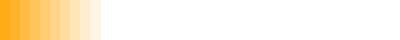

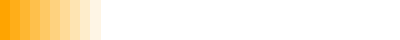

In [4]:
c1 = Color("orange")
test_luminance(c1)

c1 = Color("orange")
c2 = copy(c1)
c2.set_luminance(0.95)
scale(list(c1.range_to(c2, 10)))

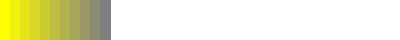

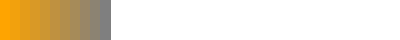

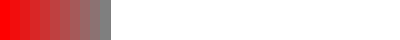

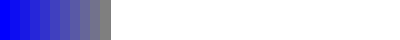

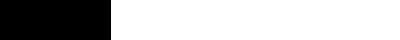

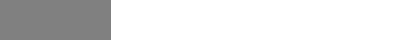

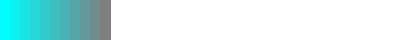

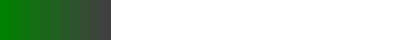

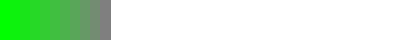

In [5]:
"""
On veut faire décroitre la saturation jusqu'à 0
"""
def test_saturation(c1: Color) -> None:
    colors = []
    iteration = 10
    pas = c1.get_saturation() / iteration
    colors.append(copy(c1))
    for i in range(iteration):
        sat = c1.get_saturation() - pas
        c1.set_saturation(sat)
        colors.append(copy(c1))
    scale(colors)

for c in tests:
    test_saturation(copy(c))

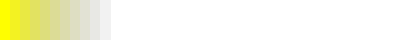

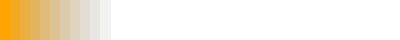

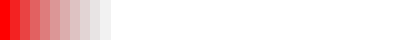

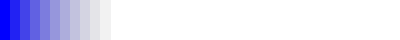

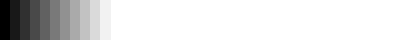

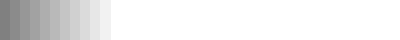

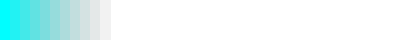

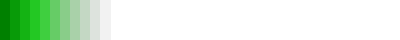

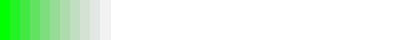

In [6]:
"""
On veut faire décroitre la saturation et augmenter la luminance
"""
def test_saturation_luminance(c1: Color) -> None:
    colors = []
    iteration = 10
    pas_sat = c1.get_saturation() / iteration
    pas_lum = (0.95 - c1.get_luminance()) / iteration
    colors.append(copy(c1))
    for i in range(iteration):
        sat = c1.get_saturation() - pas_sat
        lum = c1.get_luminance() + pas_lum
        c1.set_saturation(sat)
        c1.set_luminance(lum)
        colors.append(copy(c1))
    scale(colors)

for c in tests:
    test_saturation_luminance(copy(c))

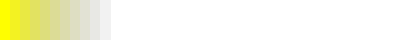

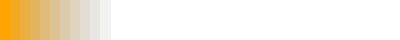

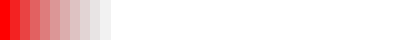

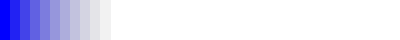

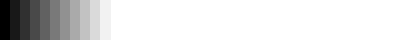

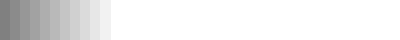

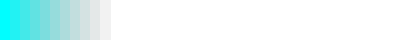

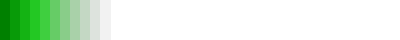

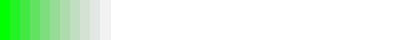

In [7]:
"""
On veut faire décroitre la saturation et augmenter la luminance
Mais la saturation doit décroitre uniquement lors des premières itérations
"""
def test_saturation_luminance(c1: Color) -> None:
    colors = []
    iteration = 10
    pas_sat = c1.get_saturation() / iteration
    pas_lum = (0.95 - c1.get_luminance()) / iteration
    colors.append(copy(c1))
    for i in range(iteration):
        if i < 10:
            sat = c1.get_saturation() - pas_sat
            c1.set_saturation(sat)
        lum = c1.get_luminance() + pas_lum
        c1.set_luminance(lum)
        colors.append(copy(c1))
    scale(colors)

for c in tests:
    test_saturation_luminance(copy(c))

In [20]:
import psycopg2 as psql
from prettytable import from_db_cursor, MARKDOWN 

conn = psql.connect(database="sparte",user="sparte_user", password="1234", host="localhost")
conn.set_session(autocommit=True)
cur = conn.cursor()

query = """
select percentile, min(pop2005), max(pop2005)
from 
(
    select pop2005,
           case 
                when sum(pop2005) over (order by pop2005) > 0.9 * sum(pop2005) over () then '100%'
                when sum(pop2005) over (order by pop2005) > 0.8 * sum(pop2005) over () then '090%'
                when sum(pop2005) over (order by pop2005) > 0.7 * sum(pop2005) over () then '080%'
                when sum(pop2005) over (order by pop2005) > 0.6 * sum(pop2005) over () then '070%'
                when sum(pop2005) over (order by pop2005) > 0.5 * sum(pop2005) over () then '060%'
                when sum(pop2005) over (order by pop2005) > 0.4 * sum(pop2005) over () then '050%'
                when sum(pop2005) over (order by pop2005) > 0.3 * sum(pop2005) over () then '040%'
                when sum(pop2005) over (order by pop2005) > 0.2 * sum(pop2005) over () then '030%'
                when sum(pop2005) over (order by pop2005) > 0.1 * sum(pop2005) over () then '020%'
                else '010%'
            end as percentile
    from carto_worldborder
) as t
group by percentile
order by percentile asc;
"""

cur.execute(query)
mytable = from_db_cursor(cur)
mytable.align = "r"
mytable.set_style(MARKDOWN)

c1 = Color("orange")
c2 = copy(c1)
c2.set_luminance(0.95)

mytable.add_column("color", [c.hex_l for c in c1.range_to(c2, 9)])


print(mytable)

[('010%', 0, 16295102), ('020%', 17795149, 36899747), ('030%', 38195558, 63002911), ('040%', 69420607, 104266392), ('050%', 127896740, 158080591), ('060%', 186830759, 226063044), ('070%', 299846449, 299846449), ('080%', 1134403141, 1134403141), ('100%', 1312978855, 1312978855)]
| percentile |        min |        max |  color  |
|------------|------------|------------|---------|
|       010% |          0 |   16295102 | #ffa500 |
|       020% |   17795149 |   36899747 | #ffaf1d |
|       030% |   38195558 |   63002911 | #ffba39 |
|       040% |   69420607 |  104266392 | #ffc456 |
|       050% |  127896740 |  158080591 | #ffce72 |
|       060% |  186830759 |  226063044 | #ffd88f |
|       070% |  299846449 |  299846449 | #ffe2ac |
|       080% | 1134403141 | 1134403141 | #ffecc8 |
|       100% | 1312978855 | 1312978855 | #fff6e5 |


VioletRed


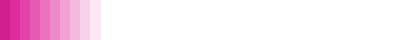

In [17]:
from random import choice
from colour import RGB_TO_COLOR_NAMES

color_name = choice([_ for t in RGB_TO_COLOR_NAMES.items() for _ in t[1]])
print(color_name)

c1 = Color(color_name)
c2 = copy(c1)
c2.set_luminance(0.95)
scale(list(c1.range_to(c2, 10)))